# Model Evaluation & Fitting
## Predicting Boston Housing Prices

In [1]:
# import libraries  here
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## 1- Data Exploration
 

### Import and explore the data. Clean the data for outliers and missing values. 

Download the Boston dataset from [here](https://drive.google.com/file/d/1Bux3hwVYr6BuFbdUIK2db1lOY6EqghfD/view?usp=sharing) , place it in the data folder and import it as dataframe. **The features in the dataset are described [here](https://www.kaggle.com/prasadperera/the-boston-housing-dataset)** 
<br> Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict. 

In [2]:
#your code here
boston = pd.read_csv("../data/Boston.csv")
boston.head() #looks like unnamed column can go.

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
boston.info() #all numerical, no NAN's 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
 14  medv        506 non-null    float64
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


<ul>
    <li>CRIM - per capita crime rate by town</li>
<li>ZN - proportion of residential land zoned for lots over 25,000 sq.ft.</li>
<li>INDUS - proportion of non-retail business acres per town.</li>
<li>CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)</li>
<li>NOX - nitric oxides concentration (parts per 10 million)</li>
<li>RM - average number of rooms per dwelling</li>
<li>AGE - proportion of owner-occupied units built prior to 1940</li>
<li>DIS - weighted distances to five Boston employment centres</li>
<li>RAD - index of accessibility to radial highways</li>
<li>TAX - full-value property-tax rate per 10,000 dollar</li>
<li>PTRATIO - pupil-teacher ratio by town</li>
<li>B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town</li>
<li>LSTAT - percentage lower status of the population </li>
<li>MEDV - Median value of owner-occupied homes in 1000's dollars</li>
    </ul>

### Next, we want to explore the data. Pick several variables you think will be most correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

In [4]:
# LSTAT and I hope that would be house-relating parameters like RM, TAX and distance to work-centres DIS, 

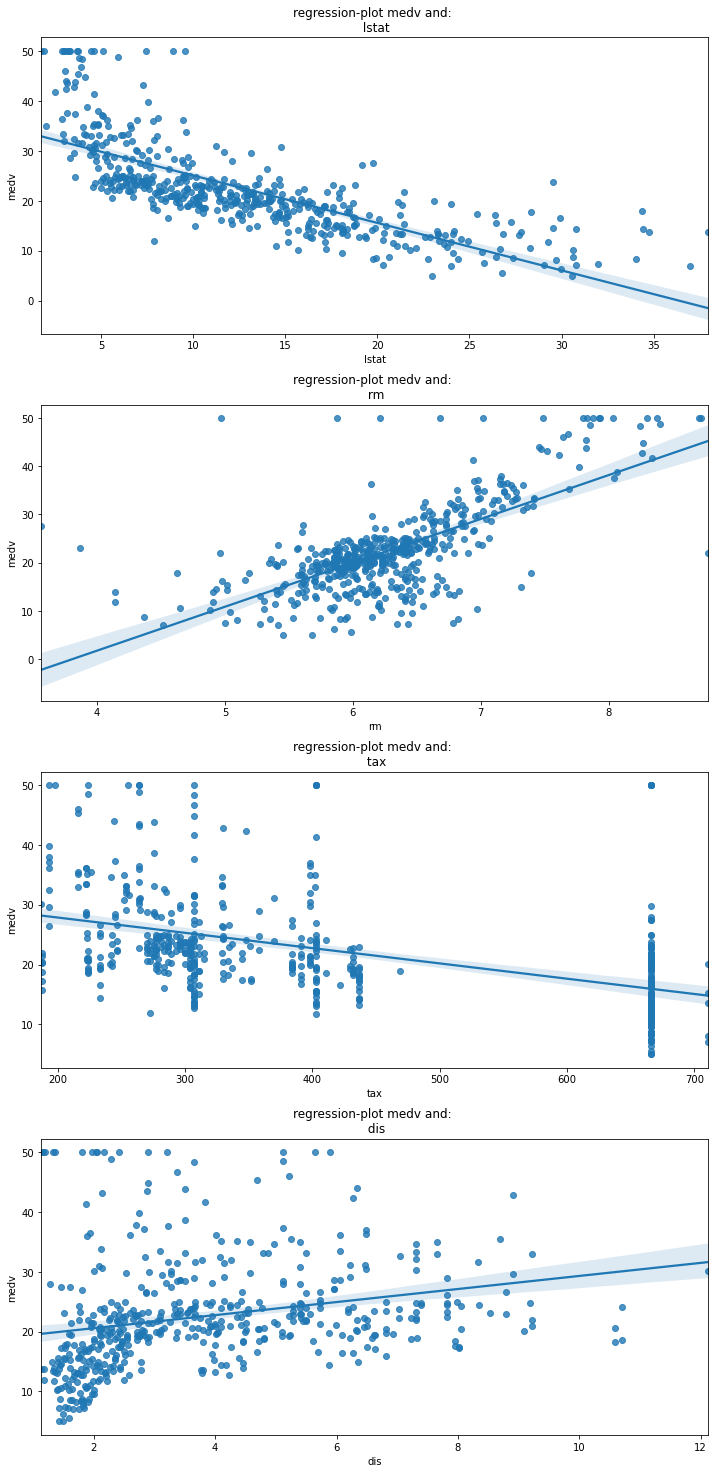

In [6]:
# Your plots here
plot_cols = boston[["lstat", "rm", "tax", "dis", "medv"]]

fig, ax = plt.subplots(4,1, figsize=(10,20))
fig.tight_layout(h_pad=5)

# Iterate to draw each scatter plot
for i in range(4):
    plt.sca(ax[i])
    sns.regplot(x=plot_cols.iloc[:, i], y=plot_cols.iloc[:, 4])
    plt.xlabel(plot_cols.columns[i])
    plt.ylabel(plot_cols.columns[4])
    plt.title(f'regression-plot medv and: \n {plot_cols.columns[i]}')
plt.show();

In [7]:
# pretty bad guesses, only rm and lstat seem to make sense. 
#The highest correlations are actually with lstat; rm; ptratio; and indus (see below)

In [24]:
corr_medv = boston.corrwith(boston["medv"]).sort_values(ascending=False)
corr_medv

medv          1.000000
rm            0.695360
zn            0.360445
black         0.333461
dis           0.249929
chas          0.175260
Unnamed: 0   -0.226604
age          -0.376955
rad          -0.381626
crim         -0.388305
nox          -0.427321
tax          -0.468536
indus        -0.483725
ptratio      -0.507787
lstat        -0.737663
dtype: float64

In [27]:
corr_medv = np.abs(corr_medv).sort_values(ascending=False) #take absolute for more overview (I dont care about the direction for now)
corr_medv

medv          1.000000
lstat         0.737663
rm            0.695360
ptratio       0.507787
indus         0.483725
tax           0.468536
nox           0.427321
crim          0.388305
rad           0.381626
age           0.376955
zn            0.360445
black         0.333461
dis           0.249929
Unnamed: 0    0.226604
chas          0.175260
dtype: float64

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables? 
 Reference: https://www.kaggle.com/c/boston-housing

In [30]:
### Your response here

# lstat: negative correlation with medv, meaning the more people with lower income, the lower the median value of owner-occupied homes
# rm: positive correlation with medv, meaning the more rooms in a house, higher the median value of owner-occupied homes
# tax: not really a strong correlation I'd say (if any a negative one)
# dis: - if any correlation - not a linear one. It seems like the curve flattens off at some point, and getting (even) further from the work-places does no longer influence the median value of owner-occupied homes.
# Being very close to employment centres seems to be not too good for the medv (although there are some very highly priced exceptions). 

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

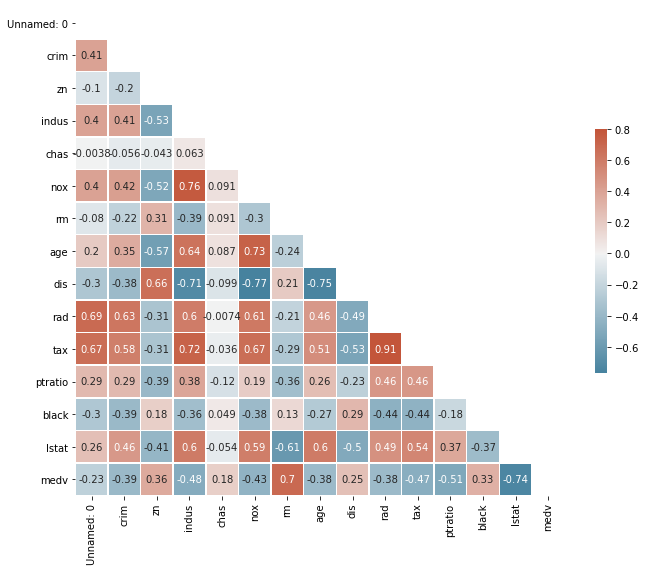

In [21]:
#your code here

rs = np.random.RandomState(33)

# Compute the correlation matrix
corr = boston.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.8, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show();

# lstat and rm seem to have the strongest correlation with medv (as also already seen in correlation scores above)

#### Significant correlations


In [ ]:
# there is a very high correlations between:
# rad & tax (>0.9)

# there are correlations >0.7 between:
# nox & indus / nox & age / nox & dis / dis & indus / indus & tax 

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [27]:
# Your code here
boston["medv"].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: medv, dtype: float64

----

## 2- Developing a Model

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [33]:
#your code here
from sklearn.model_selection import train_test_split

print(boston.columns)

X = boston[['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat']]
y = boston["medv"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle=True, random_state = 2)

Index(['Unnamed: 0', 'crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
       'rad', 'tax', 'ptratio', 'black', 'lstat', 'medv'],
      dtype='object')


----

## 3- Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [39]:
#your code here
from sklearn.ensemble import RandomForestRegressor

In [113]:
def forest_model(X_train, X_test, y_train, y_test, depth):
    """
    input: train_test_split variables and the max depth of the model
    output: performance of the model on both the training-data and test-data
    """
    forest = RandomForestRegressor(max_depth = depth) #model
    result = forest.fit(X_train, y_train) #fit model to training data
    score_train = forest.score(X_train, y_train) #training score
    score_test = forest.score(X_test, y_test) #testing score
    return(score_train, score_test)

In [65]:
depth = [2,4,6,7,10]
scores = []

for i in depth:
    scores.append(forest_model(X_train, X_test, y_train, y_test, i))

print(scores)
    

[(0.7609179135426528, 0.7983515187806605), (0.9174121460282811, 0.8691747340353745), (0.9565821628798812, 0.8805691232400545), (0.9677167380696649, 0.8953052175683284), (0.980173431703204, 0.876988023959615)]


Now, plot the score for each tree on the training set and on the testing set.

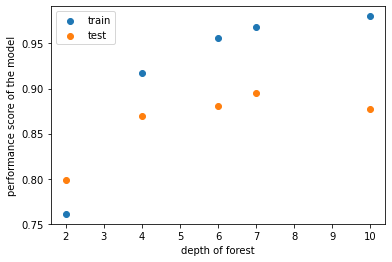

In [85]:
# Produce a plot with the score for the testing and training for the different max depths
#your code here

x_val = depth
y_val_train = [x[0] for x in scores]
y_val_test = [x[1] for x in scores]

plt.scatter(x_val,y_val_train, label = "train")
plt.scatter(x_val,y_val_test, label = "test")
plt.legend()
plt.xlabel("depth of forest")
plt.ylabel("performance score of the model")
plt.show()


What do these results tell you about the effect of the depth of the trees on the performance of the model?


In [88]:
# Your response here
"""
A deeper forest (more levels) does improve the score in the beginning, but the curve flattens quickly. Adding more levels does not improve the score by that much anymore. 
Also, the performance of  the test-model seems to flatten before the training model does, which seems to make the performance gap wider. Maybe the model gets overfitted to the training-data
"""

'\nA deeper forest (more levels) does improve the score in the beginning, but the curve flattens quickly. Adding more levels does not improve the score by that much anymore. \nAlso, the performance of  the test-model seems to flatten before the training model does, which seems to make the performance gap wider. Maybe the model gets overfitted to the training-data\n'

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [89]:
# Your response here
# depth of 1 means that the model is pretty rigid: it does not have a lot of opportunity to tweak it's prediction to fit the training-data perfectly. This would mean there is a high bias.
# depth of 10 means that the model gets a lot of "space" to fit the training-data. This could cause overfitting to the training-data: high variance.

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Based on your previous results run your model and explain its performance.

In [96]:
#I need a bit more depth to see the trend more clearly

depth = [2,4,5,6,7,10, 12, 14,16,18,20]
scores = []

for i in depth:
    scores.append(forest_model(X_train, X_test, y_train, y_test, i))



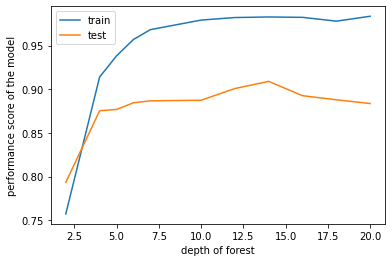

In [97]:
x_val = depth
y_val_train = [x[0] for x in scores]
y_val_test = [x[1] for x in scores]

plt.plot(x_val,y_val_train, label = "train")
plt.plot(x_val,y_val_test, label = "test")
plt.legend()
plt.xlabel("depth of forest")
plt.ylabel("performance score of the model")
plt.show()

In [ ]:
# flattens off around depth = 6 in trainingsset
# flattens off around depth = 4 in testset
#I'd therefore choose depth = 4 (I'm not interested in a model that might be overfitted to the training-set)

#### Train the Random forest regressor model with the optimal value for max_depth

In [114]:
#your code here
forest_model = RandomForestRegressor(max_depth = 4)

#### Use the mean absolute error (MAE) to calculate the performance of the model

In [115]:
#your code here
from sklearn.metrics import mean_absolute_error as MAE

In [116]:
result = forest_model.fit(X_train, y_train)

y_pred_train = result.predict(X_train) 
y_pred_test = result.predict(X_test)

MAE_test = MAE(y_test, y_pred_test)
MAE_train = MAE(y_train, y_pred_train)

print("TRAIN:", round(MAE_train,3),"\nTEST:", round(MAE_test,3))

TRAIN: 2.024 
TEST: 2.495


#### Use the root mean squared error (RMSE) to calculate the performance of the model

In [117]:
#your code here
from sklearn.metrics import mean_squared_error as RMSE

In [118]:
RMSE_test = RMSE(y_test, y_pred_test)
RMSE_train = RMSE(y_train, y_pred_train)

print("TRAIN:", round(RMSE_train,3),"\nTEST:", round(RMSE_test,3))

TRAIN: 7.169 
TEST: 10.776


#### Create a function that calculates  and returns the r2 score as performance metric

In [119]:
#your code here

def R_squared(y_true, y_predict):
    """
    input: two columns from a pandas dataframe, one being the true target value, the other the predicted one
    output: the R2-score of the model
    """
    R2_score = r2_score(y_true, y_predict)
    return R2_score


#### Calculate the r2 score of the model using the function defined above

In [120]:
#your code here
print("TRAIN:", R_squared(y_train, y_pred_train))
print("TEST:", R_squared(y_test, y_pred_test))

TRAIN: 0.9152317098148417
TEST: 0.8711958560186891


#### Bonus question
Read [this article](https://medium.com/human-in-a-machine-world/mae-and-rmse-which-metric-is-better-e60ac3bde13d) 
about the differences between MAE and RMSE. Do you think that one of the two types of error is more appropriate for this problem, and why?

In [121]:
#your answer here
"""
I'd say looking at both won't harm you but if having to choose:

MAE is less sensitive to outliers than RMSE. Meaning that when there are outliers, the RMSE score will deteriorate more than de MAE score.
In a housing dataset, the price-range might be quite high (compared eg to a dataset about ages). 
Outliers may therefore be very far out, but not of such an issue for your purpose (you do not want the perfect model for every house, but for the average house in the neighborhood).

"""

"\nI'd say looking at both won't harm you but if having to choose:\n\nMAE is less sensitive to outliers than RMSE. Meaning that when there are outliers, the RMSE score will deteriorate more than de MAE score.\nIn a housing dataset, the price-range might be quite high (compared eg to a dataset about ages). \nOutliers may therefore be very far out, but not of such an issue for your purpose (you do not want the perfect model for every house, but for the average house in the neighborhood).\n\n"

### 4 - Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [122]:
#Your response here

# maybe for Boston, but not glabally or rurally
# data from 1978 is likely not to be a good representation for todays housing-prices
# more features to the homes might be of interest, like m2 / # bathrooms / presence of a garden etc